<a href="https://colab.research.google.com/github/vamsisripada/Machine-Learning/blob/main/regression_on_penguin_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all the modules required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the data
penguins = pd.read_csv('penguins.csv')

In [5]:
# First Five rows of the data
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
# Last Five rows of the data
penguins.tail()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [7]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [8]:
# Shape of the data
penguins.shape

(344, 9)

In [10]:
# Columns of the data
penguins.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [12]:
# datatypes of the columns
penguins.dtypes

rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [18]:
# To Check the null count of each column
penguins.isnull().sum()

rowid                0
species              0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
year                 0
dtype: int64

In [19]:
penguins.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [21]:
# To replace the null values with the mean
penguins['bill_length_mm'].fillna(43.921930,inplace=True)

In [22]:
# To replace the null values with the mean
penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].mean(),inplace=True)
penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].mean(),inplace=True)
penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean(),inplace=True)

In [24]:
# To Check the null count of each column
penguins.isnull().sum()

rowid                0
species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [25]:
# Finding the Unique species
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [27]:
# Finding the count of Unique species
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

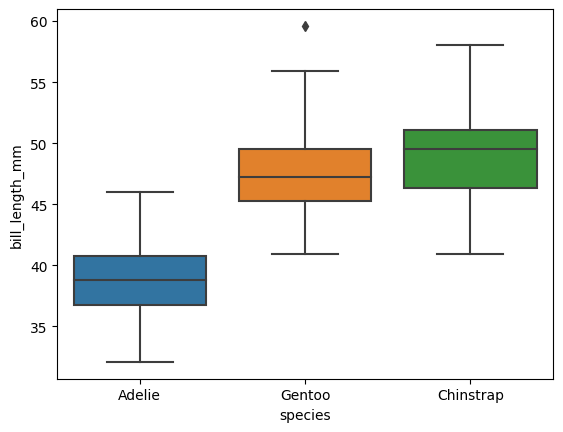

In [32]:
# Plotting a box plot between species and  bill_length_mm
sns.boxplot(x = 'species',y='bill_length_mm',data=penguins)
plt.show()

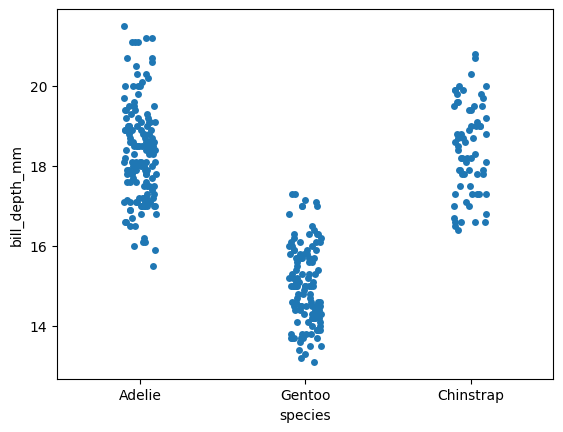

In [33]:
# stripplot b/w bill_depth and species
sns.stripplot(y='bill_depth_mm',x='species',data=penguins)
plt.show()

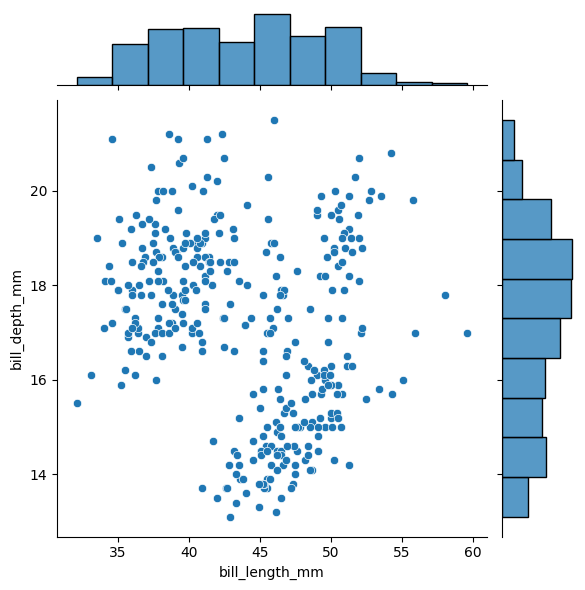

In [34]:
#A jointplot shows both bivariate scatterplot and univariate histogram in a sameplot.
sns.jointplot(x='bill_length_mm',y='bill_depth_mm',data=penguins)
plt.show()

<Axes: >

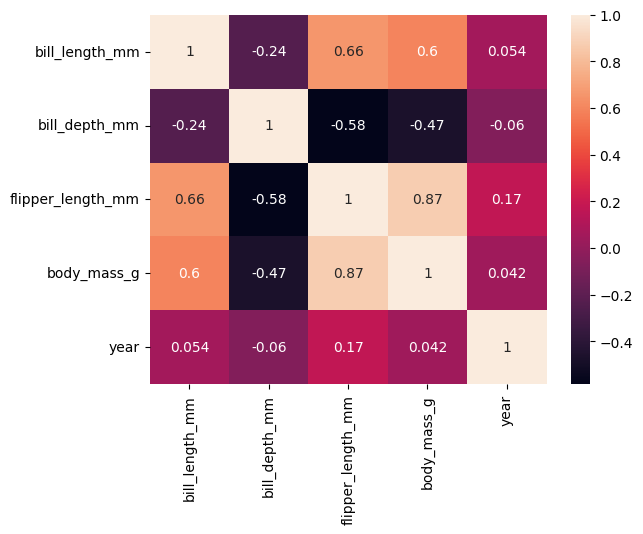

In [35]:
# heatmap is drawn from the correlation matrix
sns.heatmap(penguins.corr(),annot=True)

In [37]:
# encoding the string-valued species using replace() function
penguins['species'] = penguins['species'].replace('Chinstrap',2)
penguins['species'] = penguins['species'].replace('Gentoo',1)
penguins['species'] = penguins['species'].replace('Adelie',0)

In [38]:
penguins['species'].dtypes

dtype('int64')

In [41]:
penguins.shape

(344, 6)

In [42]:
penguins.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'year'],
      dtype='object')

In [43]:
penguins.dtypes

species                int64
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
year                   int64
dtype: object

In [44]:
X = penguins.iloc[:,1:]
y = penguins.iloc[:,0]

In [45]:
y = np.array(y).reshape(-1,1)

In [47]:
# scaling the data
from sklearn import preprocessing
X = preprocessing.scale(X)

In [48]:
# Splitting the data into training and testing..!!
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [49]:
# Checking if it's split
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(240, 5) (240, 1)
(104, 5) (104, 1)


In [50]:
# importing modules for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
# Fitting the model and making it learn
reg = LogisticRegression(C= 0.5)
reg.fit(X_train,y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.5)

In [52]:
reg.classes_

array([0, 1, 2])

In [53]:
reg.coef_

array([[-1.99267313,  1.16027191, -0.31600842,  0.21542307, -0.05859484],
       [ 0.19456648, -1.41193823,  0.91110708,  0.96800481,  0.04781248],
       [ 1.79810665,  0.25166632, -0.59509866, -1.18342788,  0.01078236]])

In [54]:
reg.intercept_

array([ 0.52376625, -0.21614406, -0.30762219])

In [55]:
# Predicting the outputs based on X_train
y_pred = reg.predict(X_train)
print(y_pred)

[1 0 1 2 1 1 1 0 0 0 2 0 0 1 0 0 1 0 1 0 1 1 2 1 1 0 0 1 0 2 1 0 0 1 2 0 1
 1 2 1 1 1 1 1 0 2 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 2 0 1 1 1 1 0 2 0 1 2 0
 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 2 1 1 2 0 0 0 0 1 0 1 0 0 0 0 1 1 2 2 1 0
 2 2 1 2 0 0 0 0 0 2 0 0 0 2 0 0 0 1 0 1 1 1 2 2 2 0 1 1 0 1 2 0 1 0 1 1 0
 0 0 0 1 1 2 0 1 1 0 2 0 2 1 0 0 1 1 0 0 1 0 0 2 1 1 0 0 2 2 0 0 1 0 0 1 2
 0 0 1 2 0 0 0 0 2 0 1 1 0 1 1 0 0 0 1 2 2 2 0 2 2 1 0 1 1 0 1 0 0 1 2 1 2
 0 1 2 0 0 0 2 1 2 1 0 1 1 2 1 0 0 1]


In [56]:
# A confusion matrix for the actual and predicted outputs based on training data
confusion_matrix(y_train,y_pred)

array([[101,   0,   0],
       [  1,  91,   0],
       [  4,   0,  43]])

In [57]:
# classification report based on the training data
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       101
           1       1.00      0.99      0.99        92
           2       1.00      0.91      0.96        47

    accuracy                           0.98       240
   macro avg       0.98      0.97      0.98       240
weighted avg       0.98      0.98      0.98       240



In [58]:
# Accuracy for the model based on training data
reg.score(X_train,y_train)

0.9791666666666666

In [59]:
# Predicting the outputs based on X_test
y_pred1 = reg.predict(X_test)
print(y_pred1)

[0 0 0 1 0 2 0 1 1 0 0 1 0 2 1 0 0 1 0 0 2 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 2
 1 0 0 0 0 0 2 2 0 2 1 0 1 0 0 0 0 0 1 0 2 1 1 1 1 0 2 1 2 0 1 2 0 2 2 0 1
 2 0 0 1 1 1 0 1 0 0 0 2 0 2 0 0 1 2 0 1 0 2 1 2 0 0 0 0 0 2]


In [60]:
# A confusion matrix for the actual and predicted outputs based on testing data
confusion_matrix(y_test,y_pred1)

array([[51,  0,  0],
       [ 0, 32,  0],
       [ 1,  0, 20]])

In [61]:
# classification report based on the testing data
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      1.00      1.00        32
           2       1.00      0.95      0.98        21

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



In [63]:
# Accuracy for the model based on testing data
reg.score(X_test,y_test)

0.9903846153846154